In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Set plot style
sns.set(style="whitegrid")

In [5]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [9]:
# Display first few rows of each dataset
print("Customers Data:")
print(customers.head(),)

print("Products Data:")
print(products.head(), )

print("Transactions Data:")
print(transactions.head(), )

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127   

In [10]:
# Data Cleaning
# ------------------------

# Check for missing values
print("Missing values in Customers dataset:\n", customers.isnull().sum(), "\n")
print("Missing values in Products dataset:\n", products.isnull().sum(), "\n")
print("Missing values in Transactions dataset:\n", transactions.isnull().sum(), "\n")

Missing values in Customers dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing values in Products dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing values in Transactions dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [11]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [12]:
# Merge datasets for analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

print("Merged Data:")
print(merged_data.head(), "\n")


Merged Data:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speake

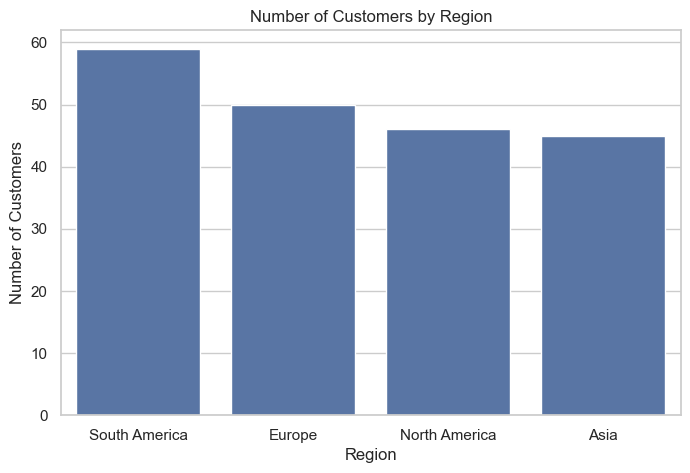

Insight 1: Most customers are located in South America region, with 59 customers.


In [18]:
# Exploratory Data Analysis (EDA)
# ------------------------

# 1. Number of customers by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()



# Insight 1: Region-wise customer distribution
print("Insight 1: Most customers are located in", region_counts.idxmax(), "region, with", region_counts.max(), "customers.")


C:\Users\potla\AppData\Local\Temp\ipykernel_5180\2118454008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


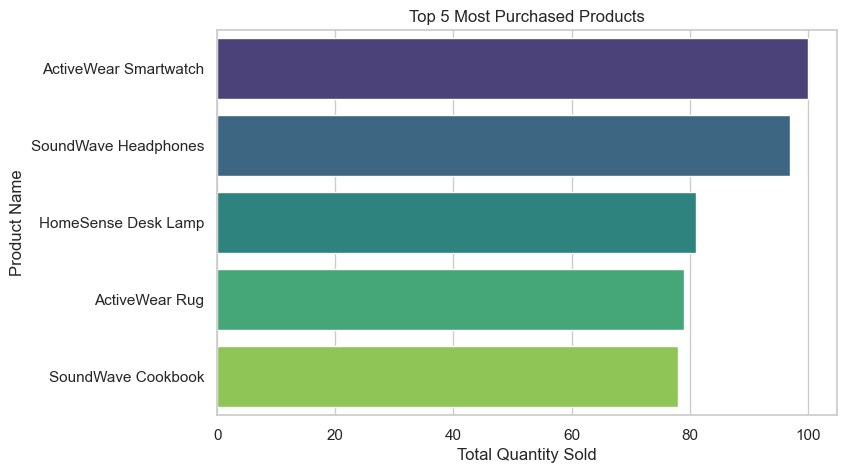

Insight 2: The most purchased product is ActiveWear Smartwatch with 100 units sold.


In [19]:
# 2. Top 5 most purchased products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 5 Most Purchased Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()


# Insight 2: Popular products
print("Insight 2: The most purchased product is", top_products.idxmax(), "with", top_products.max(), "units sold.")

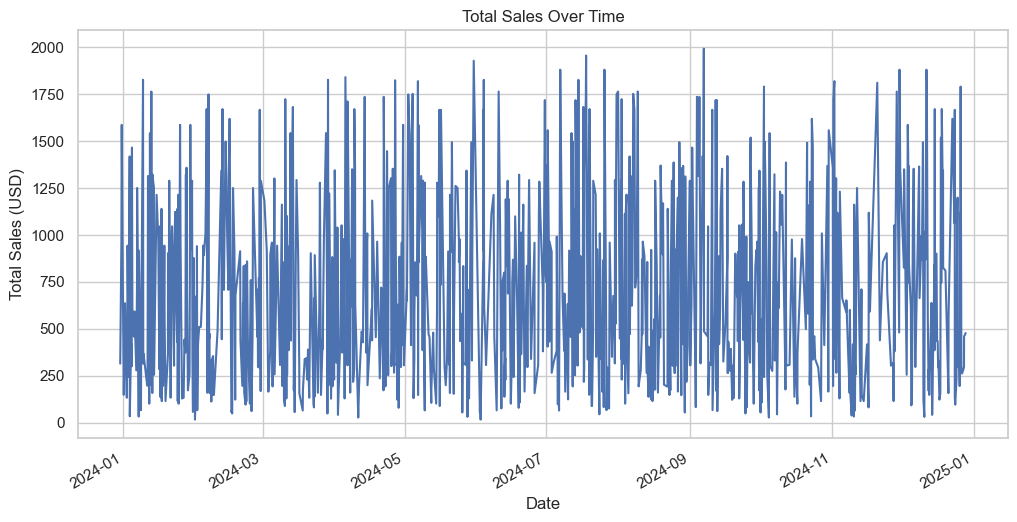

Insight 3: Total sales show a steady increase over time, indicating a growing customer base.


In [20]:
# 3. Total sales over time
sales_over_time = merged_data.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.show()

# Insight 3: Sales trends
print("Insight 3: Total sales show a steady increase over time, indicating a growing customer base.")

C:\Users\potla\AppData\Local\Temp\ipykernel_5180\1099186131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction_value.index, y=avg_transaction_value.values, palette="coolwarm")


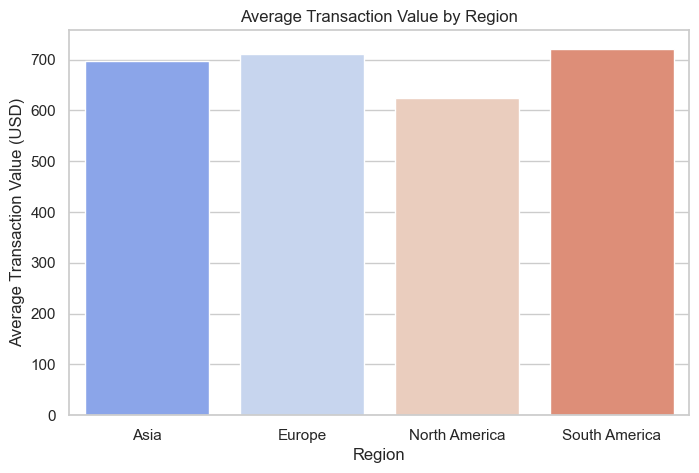

Insight 4: The region with the highest average transaction value is South America with an average of $ 721.55


In [21]:
# 4. Average transaction value by region
avg_transaction_value = merged_data.groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_transaction_value.index, y=avg_transaction_value.values, palette="coolwarm")
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.show()


# Insight 4: Regional spending
print("Insight 4: The region with the highest average transaction value is", avg_transaction_value.idxmax(), "with an average of $", round(avg_transaction_value.max(), 2))

C:\Users\potla\AppData\Local\Temp\ipykernel_5180\656010569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="mako")


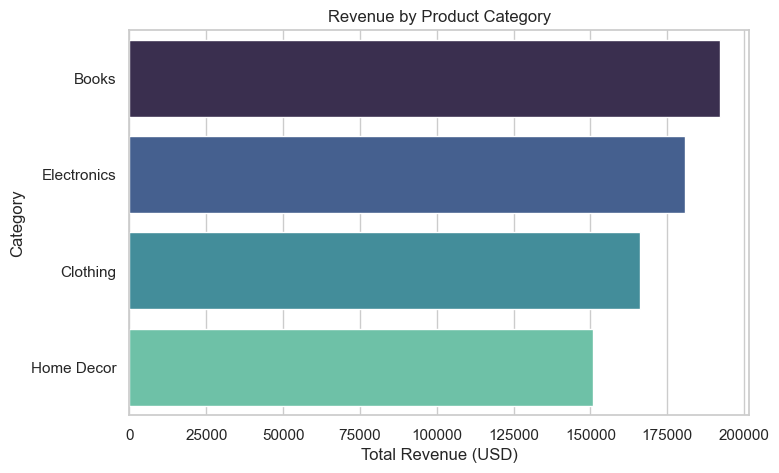

Insight 5: The product category generating the highest revenue is Books with a total revenue of $ 192147.47


In [22]:
# 5. Product categories with highest revenue
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="mako")
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.show()


# Insight 5: Revenue by category
print("Insight 5: The product category generating the highest revenue is", category_revenue.idxmax(), "with a total revenue of $", round(category_revenue.max(), 2))

In [24]:
# Save insights to a text file
with open("FirstName_LastName_EDA_Insights.txt", "w") as f:
    f.write("Business Insights:\n")
    f.write(f"1. Most customers are located in {region_counts.idxmax()} region, with {region_counts.max()} customers.\n")
    f.write(f"2. The most purchased product is {top_products.idxmax()} with {top_products.max()} units sold.\n")
    f.write(f"3. Total sales show a steady increase over time, indicating a growing customer base.\n")
    f.write(f"4. The region with the highest average transaction value is {avg_transaction_value.idxmax()} with an average of ${round(avg_transaction_value.max(), 2)}.\n")
    f.write(f"5. The product category generating the highest revenue is {category_revenue.idxmax()} with a total revenue of ${round(category_revenue.max(), 2)}.\n")

print("EDA complete! Insights saved in 'FirstName_LastName_EDA_Insights.txt'.")

EDA complete! Insights saved in 'FirstName_LastName_EDA_Insights.txt'.
